# Introducción al ajuste de modelos lineales y no lineales

Primero, una digresión. En el contexto de la estadística ciencia de datos, el término "modelo" se refiere a una función matemática que describe la relación entre dos o más variables. Una función matemática por sí misma no especifica si la relación entre las variables es causal o correlacional. Por ejemplo, el modelo $y = a + bx$ describe una relación lineal entre $x$ e $y$, pero no especifica si $x$ causa $y$ o viceversa. En este sentido, un modelo es una abstracción de la realidad. La causalidad requiere otros elementos, como la teoría y el diseño experimental.

## Modelos lineales

Un modelo lineal es una función que se puede escribir como una combinación lineal de parámetros. Por ejemplo, el modelo lineal más simple es una recta:

$$
y = a + bx
$$

donde $a$ y $b$ son los parámetros del modelo. En este caso, el modelo lineal es una función de una sola variable, $x$. En general, un modelo lineal puede ser una función de $n$ variables:

$$
y = a_0 + a_1x_1 + a_2x_2 + \dots + a_nx_n
$$

Aquí nos restrigiremos a modelos lineales de una sola variable, para ejemplificar. 

<p>En la siguiente figura del artículo de Reed (2009).<sup><a href="#fn1" id="ref1">1</a></sup></p>

<center>
  <img src="../image/matching.jpeg" width="600">
</center>

Los autores ilustran cómo utilizar la ecuación de igualación para analizar datos de evaluación descriptiva de un estudiante con comportamiento fuera de su asiento. Registran la duración del comportamiento en el asiento y fuera del asiento, así como el número de declaraciones de atención de otros durante cada comportamiento.

<ol>
  <li id="fn1">
    <p>Reed, D. D. (2009). Using Microsoft Office Excel® 2007 to conduct generalized matching analyses. Journal of Applied Behavior Analysis, 42(4), 867-875. https://doi.org/10.1901/jaba.2009.42-867.<a href="#ref1">↩</a></p>
  </li>
</ol>


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

b1 = [26, 38, 41, 45, 50]
b2 = [34, 22, 19, 15, 10]
r1 = [11, 15, 16, 18, 17]
r2 = [13, 10, 6, 3, 2]
# crear dataframe
matching_data = pd.DataFrame({'b1': b1, 'b2': b2, 'r1': r1, 'r2': r2})

Text(0.5, 0, 'r1/r2')

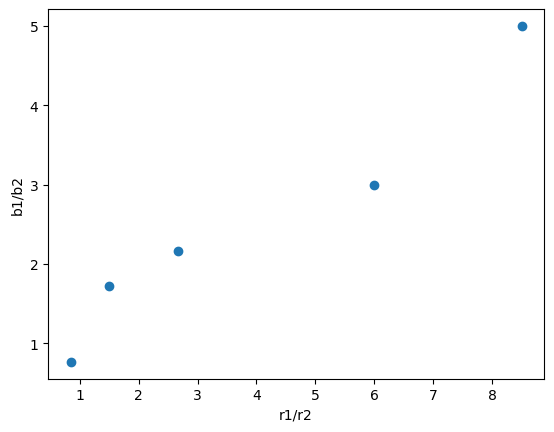

In [34]:
# graficar la razón de b1/b2 vs r1/r2
plt.scatter(matching_data['r1']/matching_data['r2'], matching_data['b1']/matching_data['b2'])
plt.ylabel('b1/b2')
plt.xlabel('r1/r2')

Text(0.5, 0, 'log10 (r1/r2)')

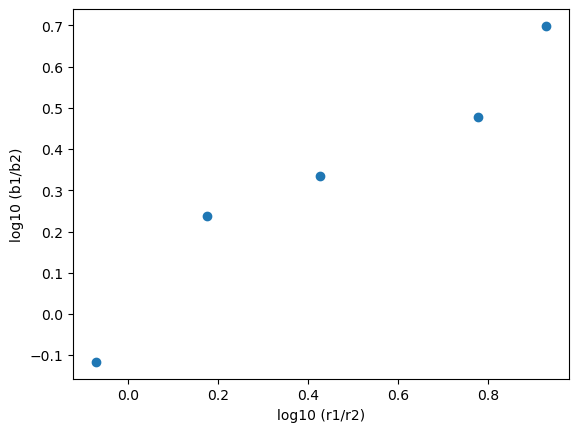

In [35]:
# graficar log10(b1/b2) vs log10(r1/r2)
plt.scatter(np.log10(matching_data['r1']/matching_data['r2']), 
            np.log10(matching_data['b1']/matching_data['b2']))
plt.ylabel('log10 (b1/b2)')
plt.xlabel('log10 (r1/r2)')

Los datos no son enteramente lineales, pero se puede ajustar un modelo lineal a los datos. En este caso, el modelo lineal es una aproximación de los datos, y no necesaraimente representa el proceso real suyacente. Sin embargo, el modelo lineal puede ser útil para predecir el comportamiento de un estudiante en el futuro, o para comparar el comportamiento de un estudiante con el de otros estudiantes, en la medida en que el modelo lineal no varíe mucho de los datos reales.

Vamos a ajustar un modelo lineal con la siguiente forma:

$$
 \log_{10}(B_1/B_2) = a + b \log_{10}(R_1/R_2)
$$

In [36]:
# ajustar una recta a los datos, basado en el modelo lineal log10(b1/b2) = a + b log10(r1/r2)
# cargamos la librería statsmodels
import statsmodels.api as sm

# ajustamos el modelo
x = np.log10(matching_data['r1']/matching_data['r2'])
X = sm.add_constant(x)
y = np.log10(matching_data['b1']/matching_data['b2'])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     41.47
Date:                Wed, 21 Jun 2023   Prob (F-statistic):            0.00759
Time:                        22:34:40   Log-Likelihood:                 6.1845
No. Observations:                   5   AIC:                            -8.369
Df Residuals:                       3   BIC:                            -9.150
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.064      0.170      0.8

/home/mrrobot/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


De todos estos resultados, los más importantes son:

1. $R^2$ es una medida de bondad de ajuste. Se puede interpretar como la proporción de la varianza de la variable dependiente que se explica por el modelo. En este caso, el modelo explica el 93.3% de la varianza de la variable dependiente. 
2. El estadístico F es una prueba de hipótesis que evalúa si el modelo es significativamente mejor que un modelo que no incluye ninguna variable independiente. Si el valor p asociado al estadístico F es menor que el nivel de significancia, entonces se rechaza la hipótesis nula de que el modelo no es significativamente mejor que un modelo sin variables independientes. 
3. Los coeficientes de regresión $a$ y $b$ son estimaciones de los parámetros del modelo. En este caso, $a = 0.01$ y $b = 0.705$. En el contexto de la ley de igualación, $a$ es un término de sesgo que se puede interpretar como una preferencia asimétrica por alguna actividad cuando no se entregan reforzadores. Si su valor es negativo, indicaría una tendencia a pasar más tiempo en la actividad que compite con la del numerador. $b$ indica la tendencia a pasar más tiempo en la alternativa con la menor proporción de reforzadores, si su valor es menor a 1 (subigualación), o la tendencia pasar más tiempo en la alternativa con la mayor proporción de reforzadores (fenómeno referido como sobreigualación) si su valor es mayor a 1. 
4. El estadístico t asociado a los parámetros $a$ y $b$ es una prueba de hipótesis que evalúa si los parámetros son significativamente diferentes de cero. Si el valor p asociado al estadístico t es menor que el nivel de significancia, entonces se rechaza la hipótesis nula de que el parámetro es cero.

La parte `sm.add_constant` agrega una columna de unos a la matriz de datos, para que el modelo lineal pueda estimar el intercepto $a$. Si no se agregara esta columna, el modelo lineal estimaría el intercepto como cero.



Agregaremos la línea de ajuste al gráfico anterior

Text(0.5, 0, 'log10 (r1/r2)')

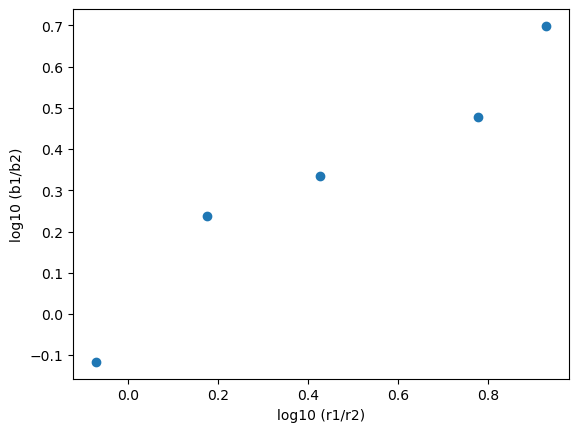

In [37]:
# graficar log10(b1/b2) vs log10(r1/r2)
plt.scatter(np.log10(matching_data['r1']/matching_data['r2']), 
            np.log10(matching_data['b1']/matching_data['b2']))
plt.ylabel('log10 (b1/b2)')
plt.xlabel('log10 (r1/r2)')

# agregar línea de ajuste



## Modelos no lineales

Los modelos no lineales son funciones que no se pueden escribir como una combinación lineal de parámetros. Estos modelos implican operaciones como exponenciación, logaritmos, raíces cuadradas, etc. 

Se debe diferenciar entre modelos no lineales y modelos no lineales en los parámetros. Por ejemplo, el modelo $y = a + bx^2$ es un modelo lineal en los parámetros, pero no lineal en $x$, dado que el término en $x$ aparece elevado al cuadrado, pero los parámetros $a$ y $b$ tienen exponente 1. 

En estadística estamos siempre interesados en estimar valores que pueden tomar los parámetros, por eso, cuando hablamos de modelos lineales o no lineales, nos referimos a modelos lineales o no lineales en los parámetros, no en las variables independientes ($x$).

Ejemplos de modelos no lineales en psicología:

* Ley de Fechner: $S = k \log (I)$

en donde $S$ es la sensación, $I$ es la intensidad del estímulo y $k$ es una constante.

* Función de descuento hiperbólico: $V = \frac{A}{1 + kD}$

en donde $V$ es el valor de un reforzador, $A$ es el valor máximo del reforzador, $D$ es el retraso/demora del reforzador y $k$ es una constante.

* Función de decaimiento exponencial de la memoria: $R = e^{-t/S}$

en donde $R$ es la recuperabilidad (la cantidad de información que se puede recuperar transcurrido $t$ tiempo), y $S$ es la constante de decaimiento.

Cargaremos los datos de un ejemplo ficticio de una tarea de descuento temporal. En esta tarea, los participantes deben elegir entre recibir $A$ dólares hoy, o $B$ dólares en $D$ días. Una forma es en la que se presentan estos pares de opciones a participantes, y se varía el valor de $D$ (el tiempo que tarda en recibir la cantidad $B$), y se coloca el valor de $D$ para el cual $A$ tiene el mismo valor que $B$ (el punto de indiferencia) en el eje de las abscisas. Luego se prueba otro par de valores de $A$ y $B$, y se repite este procedimiento para varios pares de valores de $A$ y $B$.

Dado que el valor subjetivo V está normalizado entre 0 y 1, se puede usar el modelo

$V = \frac{1}{1 + kD}$

In [38]:
# cargar datos de descuento

dd_data = pd.read_csv('../datasets/dd_data.csv')

dd_data

,Unnamed: 0,norm_sv,Delay
0,1,0.934,1
1,2,0.746,6
2,3,0.746,12
3,4,0.488,36
4,5,0.450,60
5,6,0.441,120


Text(0, 0.5, 'Normalized subjective value')

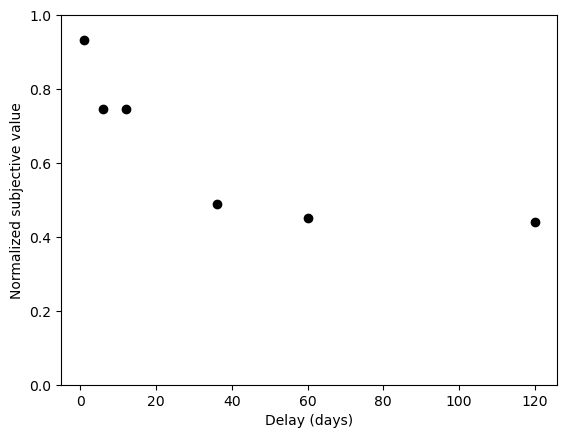

In [39]:
# graficamos los datos, norm_sv es el valor subjetivo normalizado
# delay es el tiempo de espera en días

plt.plot(dd_data['Delay'], 
         dd_data['norm_sv'], 
         'ko')
# límites de y entre 0 y 1
plt.ylim([0, 1])
plt.xlabel('Delay (days)')
plt.ylabel('Normalized subjective value')

Ajustamos $V = \frac{1}{1 + kD}$

Para realizar un ajuste no lineal, usaremos `curve_fit` de la librería `scipy.optimize`. Esta función recibe como argumentos la función que se quiere ajustar (la de descuento hiperbólico), los datos de la variable dependiente, y los datos de la variable independiente. La función devuelve dos objetos: los parámetros del modelo, y la matriz de covarianza de los parámetros.

In [40]:
# ajustar v = 1/(1 + kD) a los datos
from scipy.optimize import curve_fit

# definir el modelo no lineal como función con argumentos D y k
def hyp_discount(D, k):
    return 1 / (1 + k*D)

D = dd_data['Delay']  # Independent variable
v = dd_data['norm_sv']  # Dependent variable

# Fit the model to the data
params_hyp, params_hyp_covariance = curve_fit(hyp_discount, D, v)

# Extract the fitted parameter(s)
k = params_hyp[0]

print(f'Valor estimado de k: {k.round(3)}')


Valor estimado de k: 0.022


Para evaluar la calidad del modelo, podemos usar dos estadísticos: $R^2$ y el AIC. El estadístico $R^2$ se puede calcular como en el caso de los modelos lineales, y el AIC se puede calcular usando el error cuadrático medio (MSE) del modelo, y la cantidad de parámetros del modelo. El AIC se calcula como:

$$
AIC = n \log(MSE) + 2k
$$

En donde $n$ es la cantidad de datos, $MSE$ es el error cuadrático medio, y $k$ es la cantidad de parámetros del modelo. El AIC es un estadístico que penaliza modelos con muchos parámetros, por lo que es útil para comparar modelos con diferente cantidad de parámetros. El modelo con menor AIC es el que mejor se ajusta a los datos. El error cuadrático medio se calcula como:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

en donde $n$ es la cantidad de datos, $y_i$ es el valor observado de la variable dependiente en el dato $i$, y $\hat{y}_i$ es el valor predicho por el modelo para el dato $i$.

In [41]:
from sklearn.metrics import r2_score

# Calculate R-squared
predictions = hyp_discount(D, *params_hyp)
r2_hyp = r2_score(v, predictions)


residuals = v - hyp_discount(D, *params_hyp)

# Calculate AIC
n = len(v)  # Number of observations
k = len(params_hyp)  # Number of model parameters
mse = np.mean(residuals**2)  # Mean squared error
AIC_hyp = n * np.log(mse) + 2 * k

print(f'R-squared: {r2_hyp.round(3)}\nAIC: {AIC_hyp.round(3)}')

R-squared: 0.731
AIC: -26.069


En este caso, a diferencia del modelo lineal, el AIC no es un estadístico de prueba, sino un estadístico descriptivo. El AIC se puede usar para comparar modelos, y el modelo con menor AIC es el que mejor describe los datos. Por eso, es usual comparar el modelo hiperbòlico con el modelo exponencial:

$V = e^{-kD}$

en donde $k$ es la constante de decaimiento.

In [42]:
# ajustar el modelo exponencial v = e^(-kD) a los datos

# definir el modelo no lineal como función con argumentos D y k
def exp_discount(D, k):
    return np.exp(-k*D)
  
# Fit the model to the data
params_exp, params_exp_covariance = curve_fit(exp_discount, D, v)
# Extract the fitted parameter(s)

k_exp = params_exp[0]

print(f'Valor estimado de k: {k_exp.round(3)}')

Valor estimado de k: 0.013


Ahora calculamos el AIC y el $R^2$ para el modelo hiperbólico y el exponencial.

In [43]:
# Calculate R-squared
predictions = exp_discount(D, *params_exp)
r2 = r2_score(v, predictions)


residuals = v - exp_discount(D, *params_exp)

# Calculate AIC
n = len(v)  # Number of observations
k = len(params_exp)  # Number of model parameters
mse = np.mean(residuals**2)  # Mean squared error
AIC_exp = n * np.log(mse) + 2 * k

print("Modelo exponencial")
print(f'R-squared: {r2.round(3)}\nAIC: {AIC_exp.round(3)}')

Modelo exponencial
R-squared: 0.425
AIC: -21.509


El AIC del modelo hiperbólico es de -26.069, mientras que el del modelo exponencial es de -21.509. Dado que -26.069 es menor que -21.509, el modelo hiperbólico es el que mejor se ajusta a los datos. También podemos verificar esto graficando ambos modelos junto con los datos.

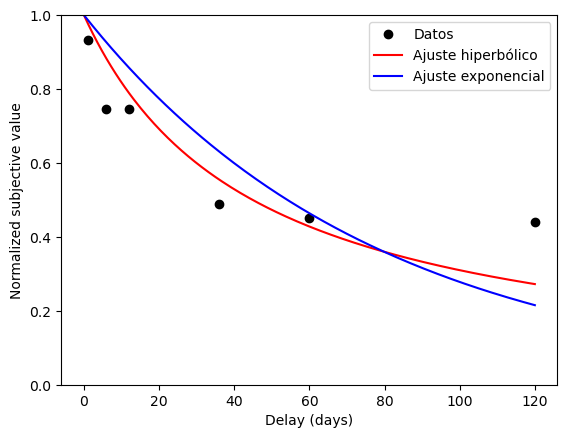

In [45]:
# graficar la línea ajustada
# usaremos la función np.linspace para generar 200 puntos entre 0 y 150
delays = np.linspace(0, 120, 200)

# creamos valores de v para cada valor de delay
v_fit_hyp = 1 / (1 + k*delays)
v_fit_exp = np.exp(-k_exp*delays)
# graficamos los datos, norm_sv es el valor subjetivo normalizado

plt.plot(dd_data['Delay'],
        dd_data['norm_sv'],
        'ko',
        label='Datos')
# límites de y entre 0 y 1
plt.ylim([0, 1])
plt.plot(delays, v_fitted, 
         'r-',
         label='Ajuste hiperbólico')
plt.plot(delays, v_fit_exp,
          'b-',
          label='Ajuste exponencial')
plt.xlabel('Delay (days)')
plt.ylabel('Normalized subjective value')
plt.legend()
